rt =  -55.0062189664


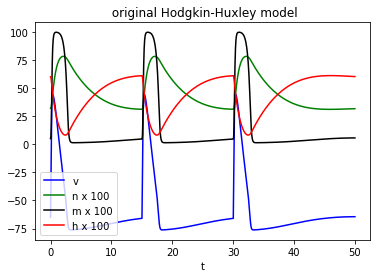

In [1]:
# DSN Project
# Reference solution for the original Hodgkin-Huxley model


from __future__ import division
from collections import OrderedDict
from array import array
import matplotlib.pyplot as plt
import numpy as np
import math
import time

t0 = 0.0
tf = 50.0

array_V = OrderedDict()
array_V[t0] = -65

array_m = OrderedDict()
array_m[t0] = 0.05

array_h = OrderedDict()
array_h[t0] = 0.6

array_n = OrderedDict()
array_n[t0] = 0.32

step = 0.02

limiarI = 5

# Constants
C_m  =   1.0 # membrane capacitance, in uF/cm^2
g_Na = 120.0 # maximum conducances, in mS/cm^2
g_K  =  36.0
g_L  =   0.3
E_Na =  50.0 # Nernst reversal potentials, in mV
E_K  = -77.0
E_L  = -54.387

# Channel gating kinetics
# Functions of membrane voltage
def alpha_m(V): return 0.1*(V+40.0)/(1.0 - np.exp(-(V+40.0) / 10.0))
def beta_m(V):  return 4.0*np.exp(-(V+65.0) / 18.0)
def alpha_h(V): return 0.07*np.exp(-(V+65.0) / 20.0)
def beta_h(V):  return 1.0/(1.0 + np.exp(-(V+35.0) / 10.0))
def alpha_n(V): return 0.01*(V+55.0)/(1.0 - np.exp(-(V+55.0) / 10.0))
def beta_n(V):  return 0.125*np.exp(-(V+65) / 80.0)

# Membrane currents (in uA/cm^2)
#  Sodium (Na = element name)
def I_Na(V,m,h):return g_Na * m**3 * h * (V - E_Na)
#  Potassium (K = element name)
def I_K(V, n):  return g_K  * n**4     * (V - E_K)
#  Leak
def I_L(V):     return g_L             * (V - E_L)  

# External current
def I_inj(t):
    global limiarI
    if (t < t0 + 0.2) or (t > t0 + 15 and t < t0 + 15 + 0.2) or (t > t0 + 30 and t < t0 + 30 + 0.2):
        return 500
    else:
        return 0.0

dVdt = lambda t, V, m, h, n: (I_inj(t) - I_Na(V, m, h) - I_K(V, n) - I_L(V)) / C_m
dmdt = lambda V, m: alpha_m(V)*(1.0-m) - beta_m(V)*m
dhdt = lambda V, h: alpha_h(V)*(1.0-h) - beta_h(V)*h
dndt = lambda V, n: alpha_n(V)*(1.0-n) - beta_n(V)*n

t = t0

while t <= tf:    
    t_anterior = t
    t = t_anterior + step
    v_anterior = array_V[t_anterior]
    m_anterior = array_m[t_anterior]
    h_anterior = array_h[t_anterior]
    n_anterior = array_n[t_anterior]
    v = v_anterior + dVdt(t_anterior, v_anterior, m_anterior, h_anterior, n_anterior) * step
    m = m_anterior + dmdt(v_anterior, m_anterior) * step
    h = h_anterior + dhdt(v_anterior, h_anterior) * step
    n = n_anterior + dndt(v_anterior, n_anterior) * step
    array_V[t] = v
    array_m[t] = m
    array_h[t] = h
    array_n[t] = n
    if v < -54.9 and v > -55.1:
         print ('rt = ', v)
    
plt.plot(array_V.keys(), array_V.values(), 'b-', label='v')
plt.plot(array_n.keys(), [x*100 for x in array_n.values()], 'g-', label='n x 100')
plt.plot(array_m.keys(), [x*100 for x in array_m.values()], 'k-', label='m x 100')
plt.plot(array_h.keys(), [x*100 for x in array_h.values()], 'r-', label='h x 100')
plt.title(' original Hodgkin-Huxley model')
plt.legend()
plt.xlabel('t')
plt.show()


# In[ ]:




